In [1]:
import numpy as np
from mlxtend.data import loadlocal_mnist
import platform
import random
X, Y = loadlocal_mnist(
            images_path='TestImageFiles/train-images-idx3-ubyte', 
            labels_path='TestImageFiles/train-labels-idx1-ubyte')
Y = Y.reshape(60000,1)
random.seed(0)
chosen = random.sample(range(60000), 2000)
trainX = X[chosen]
trainY = Y[chosen]
onehotY = np.zeros((2000, 10))
for l in range(len(trainY)):
    onehotY[l, trainY[l]] = 1
print(Y)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [2]:

print(X.shape)
print(Y.shape)
Yind = np.array(range(0,60000,1)).reshape(60000, 1)

print(Yind.shape)
Yindnew = Yind[(Y == 0) | (Y == 1)].reshape(12665,1)
Xbinarytest = X[Yindnew].reshape(12665,784)
Ybinarytest = Y[Yindnew].reshape(12665,1)
chosen = np.array(random.sample(range(12655), 600)).reshape(600,1)
Xbinarytrain = Xbinarytest[chosen].reshape(600,784)/255
Xbinarytrain = np.transpose(Xbinarytrain)
print('test' + str(Xbinarytrain.shape))
Ybinarytrain = Ybinarytest[chosen].reshape(600,1)
print(str(max(Xbinarytrain[1])) + str(min(Xbinarytrain[1])))



(60000, 784)
(60000, 1)
(60000, 1)
test(784, 600)
0.00.0


(2000, 784)


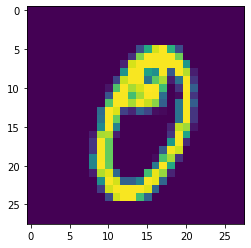

In [3]:
from matplotlib import image
from matplotlib import pyplot
print(trainX.shape)
finalshowimg = Xbinarytrain[:,1].reshape(28,28)
pyplot.imshow(finalshowimg)
# very important to test to make sure that the data is in the shape that we want. The reason that it wasn't training well was because it wasn't training on actual images

In [4]:
from FromScratch import *

def neuralnetwork(X, Y, dimensions, iterations = 3000, learning_rate = 0.05):
    X = np.squeeze(X)
    Y = np.squeeze(Y).reshape(600,1)
    print(Y.shape)
    params = initialize_params(dimensions)
    for i in range(iterations):
        AL, caches = model_forward(X, params)
        grads = model_backward(AL, Y, caches)
        params = update_parameters(params, grads, learning_rate)
        cost = compute_cost(AL,Y.T)
        if i % 100 == 0:
            print(f'Cost in epoch:{i} is {cost}')
    return params


In [14]:
dimensions = [784, 30, 30, 1]
parameters = neuralnetwork(Xbinarytrain, Ybinarytrain, dimensions = dimensions, iterations = 3000, learning_rate = 0.2)


(600, 1)
Cost in epoch:0 is 0.6930155549021362
Cost in epoch:100 is 0.6675880823475284
Cost in epoch:200 is 0.6441580543233827
Cost in epoch:300 is 0.6174312107484932
Cost in epoch:400 is 0.5860840749356345
Cost in epoch:500 is 0.5496071359093805
Cost in epoch:600 is 0.508571915624142
Cost in epoch:700 is 0.4646260701614577
Cost in epoch:800 is 0.4201695936992413
Cost in epoch:900 is 0.3774910563406377
Cost in epoch:1000 is 0.3382321468948659
Cost in epoch:1100 is 0.3033047658747021
Cost in epoch:1200 is 0.2728970468102959
Cost in epoch:1300 is 0.24676355742298636
Cost in epoch:1400 is 0.22443268068673933
Cost in epoch:1500 is 0.2053941387865939
Cost in epoch:1600 is 0.1891009300651712
Cost in epoch:1700 is 0.1750955543422732
Cost in epoch:1800 is 0.162994437136865
Cost in epoch:1900 is 0.15242692673796962
Cost in epoch:2000 is 0.14315571108241407
Cost in epoch:2100 is 0.1349933947616387
Cost in epoch:2200 is 0.12776673665184932
Cost in epoch:2300 is 0.12134270479598651
Cost in epoch:2

In [15]:
def predict_single(parameters, examplenum):
    example = Xbinarytrain[:, examplenum].reshape(784,1)
    AL, caches = model_forward(example, parameters)
    pyplot.imshow(example.reshape(28,28))
    prediction = "Image is predicted {0}, predicted exact as{1}"
    if AL < 0.5:
        return prediction.format("0", AL)
    elif AL >= 0.5:
        return prediction.format("1", AL)
    
def predict_multiple(parameters, test_set):
    test_set = 


'Image is predicted 1, predicted exact as[[0.94428738]]'

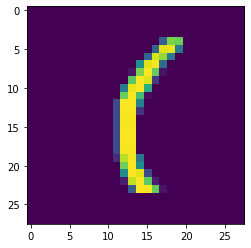

In [16]:
predict_single(parameters, 3)
chosen = np.array(random.sample(range(12655), 600)).reshape(600,1)
Xbinarytestnew = Xbinarytest[chosen].reshape(600,784)/255
Xbinarytestnew = np.transpose(Xbinarytrain)
Ybinarytestnew = Ybinarytest[chosen].reshape(600,1)